<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | April 04, 2019 (updated)<br>
        Özlem Salehi | July 07, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> Initializing a qubit with an arbitrary state </h2>

Recall that we can specify a (real-valued) quantum state by its angle ranged from 0 to $ 2\pi $ radian.

If $ \theta $ is our angle, then our quantum state is $ \ket{v} = \myvector{\cos \theta \\ \sin \theta} $.

<b> How can we set a qubit to an arbitrary quantum state when started in state $ \ket{0} $?</b>

We can use a rotation operator. Rotations preserve the lengths of vectors, and so they are quantum operators.

In qiskit, ry-gate can be used for rotation in 2-dimensional real-valued plane.

<h3> Rotation with degree $\theta$ </h3>

The matrix form of a rotation is as follows:

$$ R(\theta) = \mymatrix{rr}{\cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) }, $$

where $ \theta $ is the angle of rotation (in counter-clockwise direction).

<h3> Rotations with ry-gate </h3>

<a id="remark"></a>
<b> Technical remark</b>
    
Even though, we focus on only real-valued quantum systems in this tutorial, the quantum state of a qubit is represented by 2-dimensional complex-valued vector in general. To visually represent a complex number, we use two dimensions. So, to visually represent the state of a qubit, we use four dimensions. 
    
On the other hand, we can still visualize any state of a qubit by using certain mapping from four dimensions to three dimensions. Recall that this representation is called as <i>Bloch sphere</i>. 

The rotation operators over a single (complex-valued) qubit are defined on Bloch sphere. The names of gates "x", "y", or "z" refer to the axes on Bloch sphere. When we focus on real-valued qubit, then we should be careful about the parameter(s) that a gate takes. 

In qiskit, ry-gate makes a rotation around $y$-axis with the given angle, say $\theta$, on Bloch sphere. 
    
 $ Ry(\theta)=\mymatrix{rr}{\cos(\theta/2) & - \sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) }$


 This refers to a rotation in our real-valued $\ket{0}$-$\ket{1}$ plane with angle $ \frac{\theta}{2} $. Therefore, <b>we should provide the twice of the desired angle in this tutorial.</b>

The ry-gate is used for rotation in 2-dimensional real-valued plane.


If our angle is $ \theta $ radians, then we pass $ 2 \theta $ radians as the parameter to ry-gate.

Then ry-gate implements the rotation with angle $\theta$. 

The default direction of a rotation by ry-gate is counterclockwise.

    mycircuit.ry(angle_of_rotation,quantum_register)

Let us create a circuit with a single qubit and set its state to $ \ket{v} = \myvector{\cos \theta \\ \sin \theta} $ where $\theta= \dfrac{2 \pi}{3}$.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
mycircuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# angle of rotation in radian
rotation_angle = 2*pi/3

# rotate the qubit with rotation_angle
mycircuit1.ry(2*rotation_angle,qreg1[0]) 

# measure the qubit
mycircuit1.measure(qreg1,creg1)

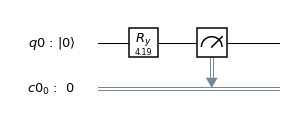

In [3]:
# draw the circuit
mycircuit1.draw(output='mpl')

In [4]:
# execute the program 1000 times
job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)

# print the results
counts = job.result().get_counts(mycircuit1)
print(counts) # counts is a dictionary

{'1': 769, '0': 231}


In [5]:
from math import sin,cos

# the quantum state
quantum_state = [ cos(rotation_angle) , sin (rotation_angle) ]

the_expected_number_of_zeros = 1000*cos(rotation_angle)**2
the_expected_number_of_ones = 1000*sin(rotation_angle)**2

# expected results
print("The expected value of observing '0' is",round(the_expected_number_of_zeros,4))
print("The expected value of observing '1' is",round(the_expected_number_of_ones,4))

The expected value of observing '0' is 250.0
The expected value of observing '1' is 750.0


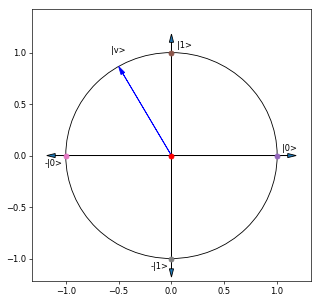

In [6]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

draw_quantum_state(quantum_state[0],quantum_state[1],"|v>")

<h3>Quantum Tomography</h3>

Suppose we have a quantum state. How can we determine its state with high accuracy?

Given that there are multiple copies of the state, there exist some methods to reconstruct the state.

Now we will see a very simple way of doing this.

You are given 1000 copies of an arbitrary quantum state which lies in the first or second quadrant of the unit circle.

This quantum state can be represented by an angle $ \theta \in [0,180) $.

<i>Please execute the following cell, but do not check the value of $\theta$.</i>

In [7]:
from random import randrange
from math import pi
 
theta = randrange(18000)/18000 * pi

We assume that the quantum state is given to us with the following code. 

    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

    # we define a quantum circuit with one qubit and one bit
    qreg2 =  QuantumRegister(1) # quantum register with a single qubit
    creg2 = ClassicalRegister(1) # classical register with a single bit
    circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers

    # rotate the qubit with rotation_angle
    circuit2.ry(2*theta,qreg2[0])

You should write further codes without using variable $theta$ again. You will implement two tasks to approximate $\theta$.

You can use 1000 shots in total when executing your quantum programs. Don't use all at once.

After your guess, please check the actual value and calculate your error in percentage.

<h3> Task 1 </h3>


Recall that any quantum state can be specified by an angle. Collect statistics about $\sin(\theta)$ (or $\cos(\theta)$), to determine the state.

<img src="../images/sincos.png">

In [ ]:
# program 1

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# import asin (inverse of sine function) from math
from math import asin

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit1.ry(2*theta,qreg1[0]) 

#
# your code is here
#

<a href="B32_Initializing_a_Qubit_Solutions.ipynb#task1">click for our solution</a>

<b> Observation: </b>

Remark that $ \sin (\theta) = \sin(\pi - \theta) $. So, we have two candidates: $\theta_1$ or $ \theta_2 = \pi - \theta_1 $.

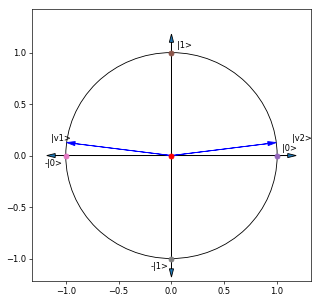

In [9]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

theta1=theta
theta2 = pi - theta1

from math import cos,sin

quantum_state1 = [ cos(theta1),sin(theta1) ]
quantum_state2 = [ cos(theta2),sin(theta2) ]

draw_quantum_state(quantum_state1[0],quantum_state1[1],"|v1>")
draw_quantum_state(quantum_state2[0],quantum_state2[1],"|v2>")

How can we distinguish them? 

Consider the following two cases:
<ul>
    <li> rotation with angle $ - \theta_1 $ and </li>
    <li> rotation with angle $ + \theta_1 $. </li>
</ul>

If $ \theta \approx \theta_1 $, then we expect to see more 0s in the first case.

If $ \theta \approx \theta_2 $, then we expect to see more 0s in the second case.

<h3>Task 2</h3>

Determine $\theta$ by considering the two cases (i.r. rotating the states and measuring afterwards for each case).

In [ ]:
# program 2

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with rotation_angle
circuit1.ry(2*theta,qreg1[0]) 

#
# your code is here
#

<a href="B32_Initializing_a_Qubit_Solutions.ipynb#task2">click for our solution</a>